# **AIML Capstone Project - AUTOMATIC TICKET ASSIGNMENT**

# Data Analysis and Clean up`



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [4]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
pip install ftfy

     |████████████████████████████████| 71kB 3.0MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.1-cp37-none-any.whl size=41573 sha256=6ad3d577e6c5e3eda19a724b4ff8fc941492e9166b50208bf8137d7037f0552c
  Stored in directory: /root/.cache/pip/wheels/ae/73/c7/9056e14b04919e5c262fe80b54133b1a88d73683d05d7ac65c
Successfully built ftfy


In [6]:
pip install google_trans_new

In [7]:
pip install langdetect

     |████████████████████████████████| 983kB 5.5MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=86ea267ab9180acb149d58765ebc2b640c5d20557feff26cf0ca7b856f8a1058
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [8]:
pip install wordcloud

In [9]:
pip install autocorrect

     |████████████████████████████████| 624kB 5.5MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.5.0-cp37-none-any.whl size=621854 sha256=1fd762dd00a47f2c1940a64d79afab722fa5de133c3433ff50b2f565705012b8
  Stored in directory: /root/.cache/pip/wheels/1f/71/da/4a15028d25fbd5fb97fb76c5f76f0ad86f0caa69394dd7cfa7
Successfully built autocorrect


In [10]:
import pandas as pd
from ftfy import *
from collections import Counter
from langdetect import detect
from google_trans_new import google_translator  
import time
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from collections import OrderedDict
from autocorrect import Speller
from nltk.tokenize import RegexpTokenizer
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import numpy, textblob, string
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import  numpy, textblob, string

In [11]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
path = '/content/drive/MyDrive/Capstone/input_data.xlsx'
dfOriginal = pd.read_excel(path)

In [13]:
dfOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


The excel sheet loaded has 4 columns of ticket details which contains a total of 8500 rows


1.   Short description --> Contains 8492 records, i.e there are around 8 null records.
2.   Description --> Contains 8499 records, i.e there are around 1 null records.
3.   Caller --> Doesn't have any blank data
2.   Assignment group --> Doesn't have any blank data



In [14]:
dfOriginal.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


* There are around 74 unique 'Assignment group'
* There are around 7482 unique 'Short description'
* There are around 7818 unique 'Description'
* There are around 2950 unique 'Caller'
* Most of the tickets are related to Password reset with 38 times of recurring.
* The caller 'bpctwhsn kzqsbmtp' has raised a maximum incidents of 810
* Majority of the tickets are that of GRP_0 with a count of 3976

In [15]:
dfOriginal.loc[5257,'Short description']

'åˆ\xa0é™¤äº†ä¸€ä¸ªexcel æ–‡æ¡£ï¼Œæ–‡æ¡£åœ°å\x9d€ï¼š\\\\HostName_17\\teams\\business\\c2 qualitycontrol\\c25 quality project\\c251 k100\\weekly layered process audi'

In [16]:
dfOriginal.loc[5257,'Description']

'åˆ\xa0é™¤äº†ä¸€ä¸ªexcel æ–‡æ¡£ï¼Œ"kmfg0042f01r00---lpa countermeasures ï¼ˆfy17 total),æ–‡æ¡£åœ°å\x9d€ï¼š\\\\HostName_17\\teams\\business\\c2 qualitycontrol\\c25 quality project\\c251 k100\\weekly layered process audit\\fy17'

* From the above displayed text it is clear that there are certain cells in which is having bad encoding. This needs to be corrected.
* This can be done using FTFY package.
* We are preforming the data fixing at the initatial stage itself as we want to explore the data set with proper records.

In [17]:
for index, row in dfOriginal.iterrows():
  try:
    row.Description=fix_encoding(row.Description)
    row['Short description']=fix_encoding(row['Short description'])
  except Exception as e:
    print(index)
    print(e)

2604
object of type 'float' has no len()
3383
object of type 'float' has no len()
3906
object of type 'float' has no len()
3910
object of type 'float' has no len()
3915
object of type 'float' has no len()
3921
object of type 'float' has no len()
3924
object of type 'float' has no len()
4341
object of type 'float' has no len()
4395
object of type 'float' has no len()


In [18]:
dfOriginal.loc[5257,'Short description']

'删除了一个excel 文档，文档地址：\\\\HostName_17\\teams\\business\\c2 qualitycontrol\\c25 quality project\\c251 k100\\weekly layered process audi'

In [19]:
dfOriginal.loc[5257,'Description']

'删除了一个excel 文档，"kmfg0042f01r00---lpa countermeasures （fy17 total),文档地址：\\\\HostName_17\\teams\\business\\c2 qualitycontrol\\c25 quality project\\c251 k100\\weekly layered process audit\\fy17'



*   By using FTFY package the bad unicode are corrected, this can be see my above text.
*   From above text it is clear that there are text containing different languages.
*   To identify this we can use language detection.
*   Adding 2 additional columns for checking language in 'Short description' and 'Description'

In [20]:
dfOriginal['Languagereveiw']=''
dfOriginal['LanguageShrtDescrib']=''

In [21]:
lang = []    

for index, row in dfOriginal.iterrows():
  try:
    lang = detect(row.Description)
    row.Languagereveiw = lang
  except Exception as e:
    row.Languagereveiw = "error"
    print(index)
    print(e)

4395
expected string or bytes-like object
6253
No features in text.
6371
No features in text.
7397
No features in text.


There are 4 cells under 'Short description' column which failed to detected.

In [22]:
dfOriginal.groupby(['Languagereveiw']).size()

Languagereveiw
af        264
ca         48
cs          2
cy          9
da         28
de        431
en       7033
error       4
es         49
et         11
fi          5
fr        112
hr          7
hu          1
id          5
it        132
ja          1
ko          9
lt          2
lv          1
nl         59
no         71
pl         33
pt         18
ro         18
sk          1
sl          7
so          1
sq          8
sv         54
sw          2
tl         10
tr          1
vi          1
zh-cn      62
dtype: int64

In [23]:
dfOriginal['LanguageShrtDescrib']=''
lang = []    

for index, row in dfOriginal.iterrows():
  try:
    lang = detect(row['Short description'])
    row.LanguageShrtDescrib = lang
  except Exception as e:
    row.LanguageShrtDescrib = "error"
    print(index)
    print(e)

1836
No features in text.
2604
expected string or bytes-like object
2975
No features in text.
3383
expected string or bytes-like object
3906
expected string or bytes-like object
3910
expected string or bytes-like object
3915
expected string or bytes-like object
3921
expected string or bytes-like object
3924
expected string or bytes-like object
4341
expected string or bytes-like object


There are 10 cells under 'Short description' column which failed to detected.

In [24]:
dfOriginal.groupby(['LanguageShrtDescrib']).size()

LanguageShrtDescrib
af        496
ca        101
cs          6
cy         26
da        102
de        399
en       6003
error      10
es         78
et         20
fi         12
fr        267
hr          5
id         13
it        281
ko         14
lt          8
lv          4
nl        147
no        151
pl         47
pt         35
ro         45
sk         13
sl         24
so          2
sq         17
sv         80
sw          1
tl         26
tr          2
vi          9
zh-cn      56
dtype: int64

By using Langdect package we are able to find out cellings of 'Short description' and 'Description'. The accuracy of the detection is found to be mixed, as there few text in which it was containing english text but was wrongly identified and also there were exception thrown when detecting

In [25]:
dfOriginal.describe()

,Short description,Description,Caller,Assignment group,Languagereveiw,LanguageShrtDescrib
count,8492,8499,8500,8500,8500,8500
unique,7481,7817,2950,74,35,33
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0,en,en
freq,38,56,810,3976,7033,6003


* Both the 'Short description' and 'Description' contains text in english.

In [26]:
# selecting rows where language details failed in case of Descriptiom
rslt_df = dfOriginal.loc[dfOriginal["Languagereveiw"]=="error"]
rslt_df

,Short description,Description,Caller,Assignment group,Languagereveiw,LanguageShrtDescrib
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0,error,en
6253,in the inbox always show there are several ema...,+86,mqbxwpfn uclrqfxa,GRP_0,error,en
6371,authorization add/delete members,\r\n\r\n,hpmwliog kqtnfvrl,GRP_0,error,en
7397,browser issue :,\r\n,fgejnhux fnkymoht,GRP_0,error,en


In [27]:
# selecting rows where language details failed in case of Shrot descriptiom
rslt_df1 = dfOriginal.loc[dfOriginal["LanguageShrtDescrib"]=="error"]
rslt_df1

,Short description,Description,Caller,Assignment group,Languagereveiw,LanguageShrtDescrib
1836,bgflmyar.xgufkidq@gmail.com,bgflmyar.xgufkidq@gmail.com wanted to check if...,olckhmvx pcqobjnd,GRP_0,en,error
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34,en,error
2975,???????????????????,\r\n\r\nreceived from: yzbjhmpw.vzrulkog@gmail...,yzbjhmpw vzrulkog,GRP_0,de,error
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0,en,error
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0,en,error
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0,en,error
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0,en,error
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0,en,error
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0,en,error
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0,en,error


As the data set is having multiple languages text the classification based on all text in english would be better, by doing this we can increase the vocabulary of data set content by converting it into english. For this we are using goofle translator here.

In [28]:
translator = google_translator()  

In [29]:
dfOriginal['EngDescription']=''
dfOriginal['EngShtDescription']=''



*   Adding additional columns for caputured the translated text of 'Short description' and 'Description'.
*   The following code is commented as it takes a long time for execution of around 5hrs with a sleep time of 1 second between each translation.
*   With sleep time less than 1 second the package was through error "TTSError: 429 (Too Many Requests) from TTS API. Probable cause: Unknown" with frequent Google API calls. As a result on the 1st execution we set it upto 1 sec wait time.
*   We are saving the data into excel sheet at steps where there were time taken and we are loading the data next time.





In [30]:
"""
for index, row in dfOriginal.iterrows():
  try:
    translate_text = translator.translate(row.Description,lang_tgt='en') 
    row.EngDescription=translate_text    
    time.sleep(1)
    translate_text = translator.translate(row['Short description'],lang_tgt='en') 
    row.EngShtDescription=translate_text
    time.sleep(1)
    print(index)
  except Exception as e:
    print(index)
    print(e)
"""

"\nfor index, row in dfOriginal.iterrows():\n  try:\n    translate_text = translator.translate(row.Description,lang_tgt='en') \n    row.EngDescription=translate_text    \n    time.sleep(1)\n    translate_text = translator.translate(row['Short description'],lang_tgt='en') \n    row.EngShtDescription=translate_text\n    time.sleep(1)\n    print(index)\n  except Exception as e:\n    print(index)\n    print(e)\n"

In [31]:
#Saving the Translated data set into excel sheet for later user.
"""
import pandas as pd
# create excel writer object
writer = pd.ExcelWriter('/content/drive/MyDrive/Capstone/EnglishTranslated.xlsx')
# write dataframe to excel
dfOriginal.to_excel(writer)
# save the excel
writer.save()
"""

"\nimport pandas as pd\n# create excel writer object\nwriter = pd.ExcelWriter('/content/drive/MyDrive/Capstone/EnglishTranslated.xlsx')\n# write dataframe to excel\ndfOriginal.to_excel(writer)\n# save the excel\nwriter.save()\n"

In [32]:
#Loading the data from the saved excel sheet.
path = '/content/drive/MyDrive/Capstone/EnglishTranslated.xlsx'
dfEngTrans = pd.read_excel(path)

In [33]:
dfEngTrans.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,Languagereveiw,LanguageShrtDescrib,EngDescription,EngShtDescription
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en,en,-verified user details.(employee# & manager na...,login issue
1,1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,en,et,received from: hmjdrvpb.komuaywn@gmail.com\r\n...,outlook
2,2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,en,en,received from: eylqgodm.ybqkwiam@gmail.com\r\n...,cant log in to vpn
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en,en,unable to access hr_tool page,unable to access hr_tool page
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,no,no,skype error,skype error


In [34]:
dfEngTrans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           8500 non-null   int64 
 1   Short description    8492 non-null   object
 2   Description          8496 non-null   object
 3   Caller               8500 non-null   object
 4   Assignment group     8500 non-null   object
 5   Languagereveiw       8500 non-null   object
 6   LanguageShrtDescrib  8500 non-null   object
 7   EngDescription       8496 non-null   object
 8   EngShtDescription    8498 non-null   object
dtypes: int64(1), object(8)
memory usage: 597.8+ KB


In [35]:
dfEngTrans['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [36]:
len(dfEngTrans['Assignment group'].unique())

74

In [37]:
len(dfEngTrans['Short description'].unique())

7482

In [38]:
len(dfEngTrans['EngShtDescription'].unique())

7367

In [39]:
len(dfEngTrans['Description'].unique())

7815

In [40]:
len(dfEngTrans['EngDescription'].unique())

7724

In [41]:
len(dfEngTrans['Caller'].unique())

2950

In [42]:
dfEngTrans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           8500 non-null   int64 
 1   Short description    8492 non-null   object
 2   Description          8496 non-null   object
 3   Caller               8500 non-null   object
 4   Assignment group     8500 non-null   object
 5   Languagereveiw       8500 non-null   object
 6   LanguageShrtDescrib  8500 non-null   object
 7   EngDescription       8496 non-null   object
 8   EngShtDescription    8498 non-null   object
dtypes: int64(1), object(8)
memory usage: 597.8+ KB


In [43]:
dfEngTrans.groupby(['EngDescription','EngShtDescription','Assignment group']).size().count()

7838

In [44]:
dfEngTrans.groupby(['Short description','Description','Assignment group']).size().count()

7900

For the above counts we can see that post translation the row count of 'Description' and 'Short Description' has been reduced individually.



In [45]:
#Printing the columns and thier blank or null count
if dfEngTrans.isnull().values.any():
  print('The given dataset contains null values.')
  print('Following are the column and its null value count')
  for (columnName, columnData) in dfEngTrans.iteritems():
   if dfEngTrans[columnName].isnull().values.any():
     print('    ['+columnName+'] : '+ str(dfEngTrans[columnName].isnull().sum())+'')
   else:
     print('    ['+columnName+'] : 0')
else :
  print('The given dataset does not contain any null values')

The given dataset contains null values.
Following are the column and its null value count
    [Unnamed: 0] : 0
    [Short description] : 8
    [Description] : 4
    [Caller] : 0
    [Assignment group] : 0
    [Languagereveiw] : 0
    [LanguageShrtDescrib] : 0
    [EngDescription] : 4
    [EngShtDescription] : 2


In [50]:
#Fill dataframe cell entries that have null with blank space
dfEngTrans.fillna(value=' ', inplace=True)

In [46]:
def WordCloudPlt(text,title) :
  wordcloud = WordCloud().generate(text)
  # Display the generated image:
  plt.figure(figsize = (15,15))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(title)
  plt.show()

In [47]:
def WordClouddf(dataColumn,title) :
  uniontext=' '
  for text in dataColumn.values:
    try:
      for word in text.split():
        uniontext= uniontext + ' ' + word
    except Exception as e:
      print(text)
      print(e)
  WordCloudPlt(uniontext,title)

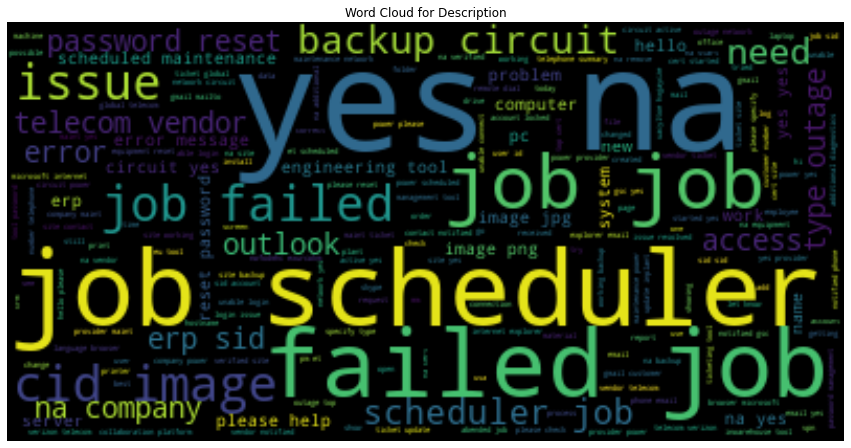

In [137]:
#Displaying the most commonly used words in Description column
WordClouddf(dfEngTrans['EngDescription'],'Word Cloud for Description')

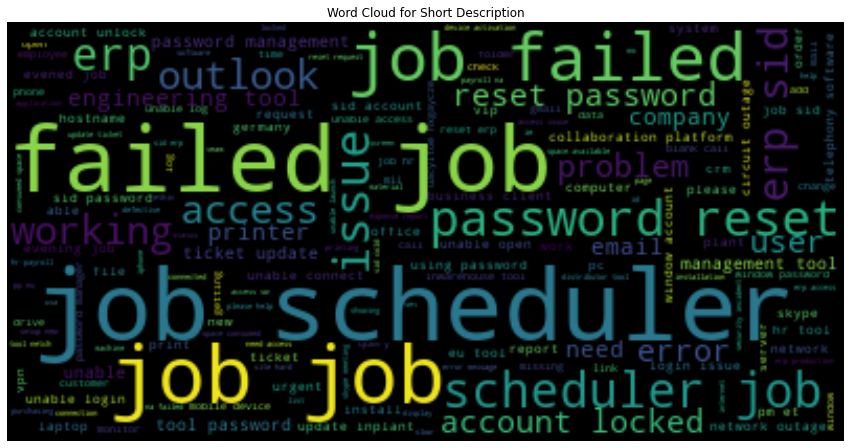

In [138]:
#Displaying the most commonly used words in Short description column
WordClouddf(dfEngTrans['EngShtDescription'],'Word Cloud for Short Description')

In [51]:
if dfEngTrans.isnull().values.any():
  print('The given dataset contains null values.')
  print('Following are the column and its null value count')
  for (columnName, columnData) in dfEngTrans.iteritems():
   if dfEngTrans[columnName].isnull().values.any():
     print('    ['+columnName+'] : '+ str(dfEngTrans[columnName].isnull().sum())+'')
   else:
     print('    ['+columnName+'] : 0')
else :
  print('The given dataset does not contain any null values')

The given dataset does not contain any null values


In [52]:
dfEngTrans.loc[1,'EngDescription']

'received from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind '

Remove the text received from: mail id text as it is irrelevant of the tickets assignment.

In [53]:
dfEngTrans['EngDescription'] = dfEngTrans['EngDescription'].str.replace('received from: \S+@\S+', ' ')
dfEngTrans['EngShtDescription'] = dfEngTrans['EngShtDescription'].str.replace('received from: \S+@\S+', ' ')

In [54]:
dfEngTrans.loc[1,'EngDescription']

' \r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind '

In [55]:
#Removing the return key, tab, next line in the text.
dfEngTrans.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=[" "," "], regex=True, inplace=True)

In [56]:
dfEngTrans.loc[1,'EngDescription']

'     hello team,    my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?    kind '

In [57]:
dfEngTrans['EngDescription'] = dfEngTrans['EngDescription'].str.lower()
dfEngTrans['EngShtDescription'] = dfEngTrans['EngShtDescription'].str.lower()

In [58]:
dfEngTrans.loc[891,'EngDescription']

'what type of outage:  _____network     ___x__circuit     _____power (please specify what type of outage)    1. top 23 cert site   ?    ____yes_____     (yes/no/na)     2. when did it start  ?   _____ 83.69.48.194 6:26 am et________________    3.  scheduled maintenance ( power) ? ___no____    (yes/no/na)     company power  _________     provider power _________                    4.  scheduled maintenance ( network) ? ____no___    (yes/no/na)     company maint________ (yes/no)       provider maint/ticket #__________________        5. does site have a backup circuit ?  __yes____    (yes/no/na)     6. backup circuit active ?   __yes______     (yes/no/na)     7. site contact notified (phone/email) ?  ____yes_____     (yes/no/na)     8. remote dial-in ?   ___________   (yes/no/na)     9. equipment reset ?    ___________    (yes/no/na)     10. verified site working on backup circuit ?  _______     (yes/no/na)     11. vendor ticket  # ( global_telecom_1, verizon, telecom_vendor_1, telecom_ve

In [59]:
#Removing the punctuation of the text
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans(PUNCT_TO_REMOVE, ' '*len(PUNCT_TO_REMOVE)))    

dfEngTrans['EngDescription']  = dfEngTrans['EngDescription'] .apply(lambda text: remove_punctuation(text))
dfEngTrans['EngShtDescription']  = dfEngTrans['EngShtDescription'] .apply(lambda text: remove_punctuation(text))


In [60]:
dfEngTrans.loc[891,'EngDescription']

'what type of outage        network        x  circuit          power  please specify what type of outage     1  top 23 cert site            yes           yes no na      2  when did it start            83 69 48 194 6 26 am et                    3   scheduled maintenance   power       no         yes no na      company power                provider power                              4   scheduled maintenance   network        no        yes no na      company maint          yes no        provider maint ticket                            5  does site have a backup circuit      yes         yes no na      6  backup circuit active       yes            yes no na      7  site contact notified  phone email         yes           yes no na      8  remote dial in                    yes no na      9  equipment reset                      yes no na      10  verified site working on backup circuit                 yes no na      11  vendor ticket      global telecom 1  verizon  telecom vendor 1  telecom ve

In [61]:
dfEngTrans.loc[1,'EngDescription']

'     hello team     my meetings skype meetings etc are not appearing in my outlook calendar  can somebody please advise how to correct this     kind '

In [62]:
# Strippin the leading and trailing spaces
dfEngTrans['EngDescription'] = dfEngTrans['EngDescription'].str.strip()
dfEngTrans['EngShtDescription'] = dfEngTrans['EngShtDescription'].str.strip()

In [63]:
dfEngTrans.loc[1,'EngDescription']

'hello team     my meetings skype meetings etc are not appearing in my outlook calendar  can somebody please advise how to correct this     kind'

In [64]:
dfEngTrans.loc[891,'EngDescription']

'what type of outage        network        x  circuit          power  please specify what type of outage     1  top 23 cert site            yes           yes no na      2  when did it start            83 69 48 194 6 26 am et                    3   scheduled maintenance   power       no         yes no na      company power                provider power                              4   scheduled maintenance   network        no        yes no na      company maint          yes no        provider maint ticket                            5  does site have a backup circuit      yes         yes no na      6  backup circuit active       yes            yes no na      7  site contact notified  phone email         yes           yes no na      8  remote dial in                    yes no na      9  equipment reset                      yes no na      10  verified site working on backup circuit                 yes no na      11  vendor ticket      global telecom 1  verizon  telecom vendor 1  telecom ve

In [65]:
#Removing the caller names from the text in the columns as its irrelavent for the ticket assignment.
for index, row in dfEngTrans.iterrows():
  for word in row['Caller'].split():
    row['EngDescription'] = row['EngDescription'].replace(word, ' ')
    row['EngShtDescription'] = row['EngShtDescription'].replace(word, ' ')
  

In [66]:
#Removing the additional spaces in the text in the data set.
dfEngTrans['EngDescription'] = dfEngTrans['EngDescription'].str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ')
dfEngTrans['EngShtDescription'] = dfEngTrans['EngShtDescription'].str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ')

In [67]:
dfEngTrans.loc[1,'EngDescription']

'hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind'

In [68]:
dfEngTrans.loc[891,'EngDescription']

'what type of outage network x circuit power please specify what type of outage 1 top 23 cert site yes yes no na 2 when did it start 83 69 48 194 6 26 am et 3 scheduled maintenance power no yes no na company power provider power 4 scheduled maintenance network no yes no na company maint yes no provider maint ticket 5 does site have a backup circuit yes yes no na 6 backup circuit active yes yes no na 7 site contact notified phone email yes yes no na 8 remote dial in yes no na 9 equipment reset yes no na 10 verified site working on backup circuit yes no na 11 vendor ticket global telecom 1 verizon telecom vendor 1 telecom vendor 2  12 notified gsc yes no na cert started yes no na 13 additional diagnostics'

In [69]:
#Dropping the columns that are not needed.
dfEngTrans.drop(columns=['Unnamed: 0','Short description', 'Description', 'Caller','Languagereveiw','LanguageShrtDescrib'],axis='columns', inplace=True)

In [70]:
dfEngTrans.groupby(['Assignment group']).size().reset_index(name='count').sort_values(['count'], ascending=False)

,Assignment group,count
0,GRP_0,3976
72,GRP_8,661
17,GRP_24,289
4,GRP_12,257
73,GRP_9,252
...,...,...
58,GRP_61,1
64,GRP_67,1
29,GRP_35,1
68,GRP_70,1


In [71]:
targetClassCnt=dfEngTrans['Assignment group'].value_counts()
targetClassCnt.describe()

count      74.000000
mean      114.864865
std       465.747516
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3976.000000
Name: Assignment group, dtype: float64

From the above count we can see that 

*   Total count unique Assignment group is 74
*   Group with minimum count is 1
*   Group with maximum count is 3976
*   On an average of ticket is 114.86



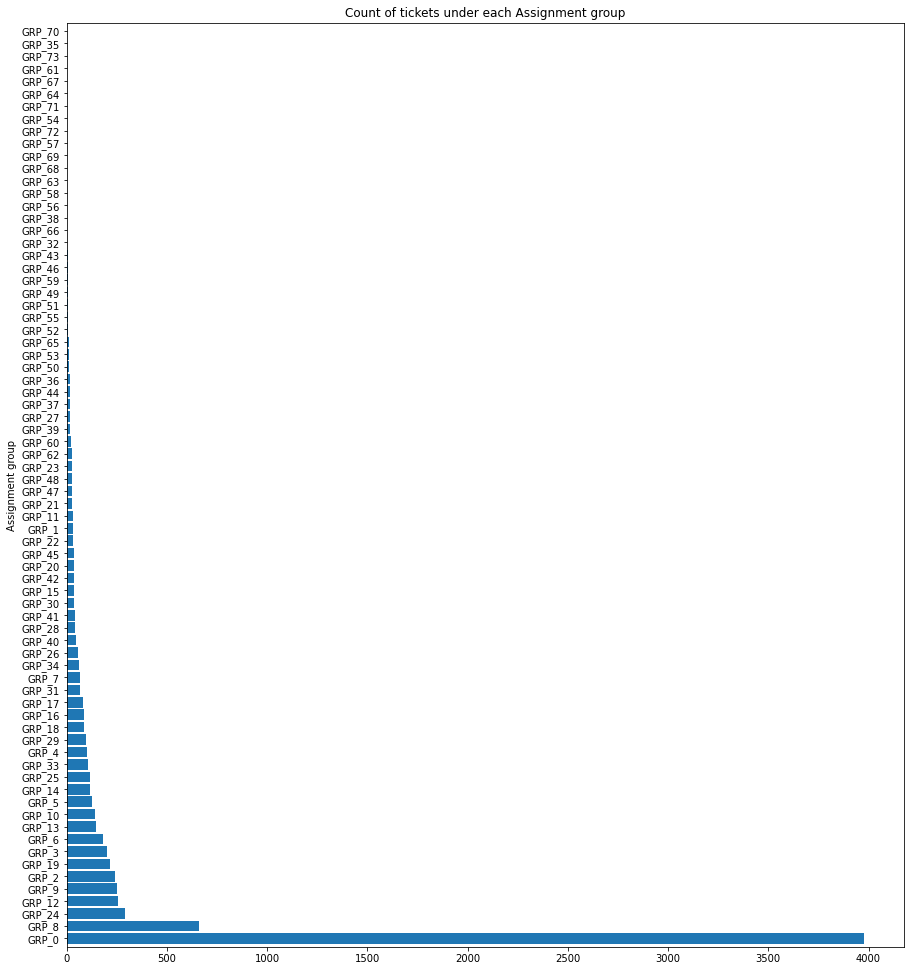

In [72]:
df_gb=dfEngTrans.groupby(['Assignment group']).size().sort_values(ascending=False)
df_gb.plot.barh(figsize=(15, 17), zorder=2, width=0.85, title="Count of tickets under each Assignment group")

From the above graph it is clear that GRP_0 is having the maximum tickets assigned of 3976

In [73]:
#Printing the stop words
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [74]:
#Remove the stop words from the text in the data set.
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

dfEngTrans['EngShtDescription']  = dfEngTrans['EngShtDescription'].apply(lambda text: remove_stopwords(text))
dfEngTrans['EngDescription']  = dfEngTrans['EngDescription'].apply(lambda text: remove_stopwords(text))

In [75]:
#Removing the numbers from the text in the dataset.
dfEngTrans['EngDescription'].replace('\d+', ' ', regex=True, inplace=True)
dfEngTrans['EngShtDescription'].replace('\d+', ' ', regex=True, inplace=True)

In [76]:
#Finding the words and thier occurance in the Description column
cnt = Counter()
for text in dfEngTrans['EngDescription'].values:
    for word in text.split():
        cnt[word] += 1

In [77]:
cnt

Counter({'verified': 187,
         'user': 1185,
         'details': 168,
         'employee': 150,
         'manager': 321,
         'name': 596,
         'checked': 87,
         'ad': 122,
         'reset': 857,
         'password': 1401,
         'advised': 55,
         'login': 558,
         'check': 355,
         'caller': 89,
         'confirmed': 118,
         'able': 387,
         'issue': 818,
         'resolved': 128,
         'hello': 725,
         'team': 386,
         'meetings': 21,
         'skype': 281,
         'etc': 57,
         'appearing': 17,
         'outlook': 528,
         'calendar': 37,
         'somebody': 2,
         'please': 2119,
         'advise': 96,
         'correct': 89,
         'kind': 66,
         'hi': 405,
         'cannot': 304,
         'log': 310,
         'vpn': 304,
         'best': 373,
         'unable': 790,
         'access': 829,
         'hr': 171,
         'tool': 1050,
         'page': 102,
         'error': 799,
         'engineer

In [78]:
print('Description Before lemmatizer :' + str(len(cnt)))

Description Before lemmatizer :11996


In [79]:
cnt1 = Counter()
for text in dfEngTrans['EngShtDescription'].values:
    for word in text.split():
        cnt1[word] += 1

In [80]:
cnt1

Counter({'login': 332,
         'issue': 486,
         'outlook': 418,
         'cant': 13,
         'log': 131,
         'vpn': 237,
         'unable': 720,
         'access': 495,
         'hr': 122,
         'tool': 736,
         'page': 32,
         'skype': 224,
         'error': 303,
         'engineering': 218,
         'event': 12,
         'critical': 11,
         'hostname': 357,
         'company': 356,
         'com': 117,
         'value': 10,
         'mountpoint': 1,
         'threshold': 21,
         'oracle': 9,
         'sid': 599,
         'erpdata': 2,
         'ticket': 281,
         'no': 92,
         'employment': 5,
         'status': 43,
         'new': 170,
         'non': 9,
         'employee': 45,
         'enter': 17,
         'user': 260,
         'name': 27,
         'disable': 4,
         'add': 64,
         'ins': 1,
         'update': 262,
         'inplant': 99,
         'says': 10,
         'connected': 30,
         'submit': 20,
         'reports':

In [81]:
print('Short Description Before lemmatizer :' + str(len(cnt1)))

Short Description Before lemmatizer :5365


Using Lemmatizer approach as the stemming would be triming the text when applied.

In [82]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

dfEngTrans['EngDescription'] = dfEngTrans['EngDescription'].apply(lambda text: lemmatize_words(text))
dfEngTrans['EngShtDescription'] = dfEngTrans['EngShtDescription'].apply(lambda text: lemmatize_words(text))

In [83]:
cnt2 = Counter()
for text in dfEngTrans['EngShtDescription'].values:
    for word in text.split():
        cnt2[word] += 1

In [84]:
cnt2

Counter({'login': 332,
         'issue': 561,
         'outlook': 418,
         'cant': 13,
         'log': 131,
         'vpn': 237,
         'unable': 720,
         'access': 496,
         'hr': 123,
         'tool': 766,
         'page': 38,
         'skype': 224,
         'error': 312,
         'engineering': 218,
         'event': 13,
         'critical': 11,
         'hostname': 357,
         'company': 357,
         'com': 117,
         'value': 12,
         'mountpoint': 1,
         'threshold': 21,
         'oracle': 9,
         'sid': 599,
         'erpdata': 2,
         'ticket': 287,
         'no': 93,
         'employment': 5,
         'status': 43,
         'new': 170,
         'non': 9,
         'employee': 58,
         'enter': 17,
         'user': 297,
         'name': 30,
         'disable': 4,
         'add': 64,
         'in': 42,
         'update': 266,
         'inplant': 99,
         'say': 10,
         'connected': 30,
         'submit': 20,
         'report': 1

In [85]:
print('Short Description After lemmatizer :' + str(len(cnt2)))

Short Description After lemmatizer :5041


In [86]:
#Finding the words and thier occurance in the Description column
cnt3 = Counter()
for text in dfEngTrans['EngDescription'].values:
    for word in text.split():
        cnt3[word] += 1

In [87]:
cnt3

Counter({'verified': 187,
         'user': 1374,
         'detail': 204,
         'employee': 188,
         'manager': 327,
         'name': 607,
         'checked': 87,
         'ad': 122,
         'reset': 858,
         'password': 1494,
         'advised': 55,
         'login': 558,
         'check': 357,
         'caller': 89,
         'confirmed': 118,
         'able': 387,
         'issue': 951,
         'resolved': 128,
         'hello': 725,
         'team': 404,
         'meeting': 87,
         'skype': 281,
         'etc': 57,
         'appearing': 17,
         'outlook': 528,
         'calendar': 39,
         'somebody': 2,
         'please': 2119,
         'advise': 96,
         'correct': 89,
         'kind': 66,
         'hi': 405,
         'cannot': 304,
         'log': 315,
         'vpn': 304,
         'best': 373,
         'unable': 790,
         'access': 834,
         'hr': 181,
         'tool': 1108,
         'page': 118,
         'error': 835,
         'engineerin

In [88]:
print('Description after lemmatizer :' + str(len(cnt3)))

Description after lemmatizer :11391


In [89]:
#Creating a new dataframe of Description and Assignment group
selected_columns = dfEngTrans[['EngDescription','Assignment group']]
dfEngDescr = selected_columns.copy()

In [90]:
#Creating a new dataframe of Short Description and Assignment group
selected_columns = dfEngTrans[['EngShtDescription','Assignment group']]
dfEngShtDescr = selected_columns.copy()

In [91]:
#Renaming the column name from 'EngShtDescription' to 'EngDescription' for union the newly created data set
dfEngShtDescr.rename(columns = {'EngShtDescription' : 'EngDescription'}, inplace = True)

In [92]:
#Creating a union of short description and description into a bigger data frame
union = pd.concat([dfEngDescr, dfEngShtDescr], ignore_index=True)

Creating a 2 data sets by having the Description with Assignment group and Short Description with Assignment group data sets and merging the data set inorder to increase the data set to test and train.  

In [93]:
union.describe()

,EngDescription,Assignment group
count,17000,17000
unique,10519,74
top,job job failed job scheduler,GRP_0
freq,870,7952


With the union data we can see that
* Their are around 10490 unique records in description
* Job, failed and scheduler is the most common text

In [94]:
#Removing the numbers from the text in the dataset.
union['EngDescription'].replace('\d+', ' ', regex=True, inplace=True)

In [95]:
union['EngDescription'] = union['EngDescription'].str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ').str.replace('  ', ' ')

In [96]:
if union.isnull().values.any():
  print('The given dataset contains null values.')
  print('Following are the column and its null value count')
  for (columnName, columnData) in union.iteritems():
   if union[columnName].isnull().values.any():
     print('    ['+columnName+'] : '+ str(union[columnName].isnull().sum())+'')
   else:
     print('    ['+columnName+'] : 0')
else :
  print('The given dataset does not contain any null values')

The given dataset does not contain any null values


In [97]:
union[union['EngDescription'].isnull()]

,EngDescription,Assignment group


In [98]:
#Removing the multiple occurance of a given word with the text.
union['EngDescription'] = (union['EngDescription'].str.split()
                              .apply(lambda x: OrderedDict.fromkeys(x).keys())
                              .str.join(' '))

In [99]:
if union.isnull().values.any():
  print('The given dataset contains null values.')
  print('Following are the column and its null value count')
  for (columnName, columnData) in union.iteritems():
   if union[columnName].isnull().values.any():
     print('    ['+columnName+'] : '+ str(union[columnName].isnull().sum())+'')
   else:
     print('    ['+columnName+'] : 0')
else :
  print('The given dataset does not contain any null values')

The given dataset does not contain any null values


In [100]:
#Creating a new column to label encode Assignment group
union['Assignment group Number']=''

In [101]:
for index, row in union.iterrows():
 # try:
 strTxt = row['Assignment group'].replace('GRP_', '').replace(' ', '')
 row['Assignment group Number']= strTxt

In [102]:
len(union['Assignment group Number'].unique())

74

In [103]:
union.groupby(['EngDescription','Assignment group']).size().count()

10657

From the above count we can see that there are duplicate values for the given Description and Assignment group.

In [104]:
#Drop the duplicate records
union=union.drop_duplicates(keep='last')

In [105]:
union.groupby(['EngDescription','Assignment group']).size().count()

10657

In [106]:
union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10657 entries, 0 to 16999
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EngDescription           10657 non-null  object
 1   Assignment group         10657 non-null  object
 2   Assignment group Number  10657 non-null  object
dtypes: object(3)
memory usage: 333.0+ KB


In [107]:
union[union['EngDescription'] == '']

,EngDescription,Assignment group,Assignment group Number
707,,GRP_3,3
3937,,GRP_53,53
6888,,GRP_2,2
8168,,GRP_17,17
13894,,GRP_9,9
15897,,GRP_0,0


In [108]:
#Dropping the columns that have blank value.
union.drop(union[union['EngDescription'] == ''].index, inplace = True)

In [109]:
union[union['EngDescription'] == '']

,EngDescription,Assignment group,Assignment group Number


In [110]:
union[union['EngDescription'].isnull()]

,EngDescription,Assignment group,Assignment group Number


In [111]:
union.drop(union[union['EngDescription'].isnull()].index, inplace = True)

In [112]:
union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10651 entries, 0 to 16999
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EngDescription           10651 non-null  object
 1   Assignment group         10651 non-null  object
 2   Assignment group Number  10651 non-null  object
dtypes: object(3)
memory usage: 652.8+ KB


In [113]:
# create excel writer object
writer = pd.ExcelWriter('/content/drive/MyDrive/Capstone/union_Eng.xlsx')
# write dataframe to excel
union.to_excel(writer)
# save the excel
writer.save()

In [114]:
path = '/content/drive/MyDrive/Capstone/union_Eng.xlsx'
union = pd.read_excel(path)

In [115]:
union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10651 entries, 0 to 10650
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               10651 non-null  int64 
 1   EngDescription           10651 non-null  object
 2   Assignment group         10651 non-null  object
 3   Assignment group Number  10651 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 333.0+ KB


In [116]:
union.drop(columns=['Unnamed: 0'],axis='columns', inplace=True)

In [117]:
union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10651 entries, 0 to 10650
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EngDescription           10651 non-null  object
 1   Assignment group         10651 non-null  object
 2   Assignment group Number  10651 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 249.8+ KB


In [118]:
union.head()

,EngDescription,Assignment group,Assignment group Number
0,verified user detail employee manager name che...,GRP_0,0
1,hello team meeting skype etc appearing outlook...,GRP_0,0
2,hi cannot log vpn best,GRP_0,0
3,event critical hostname company com value moun...,GRP_1,1
4,hi unable login company vpn website trying ope...,GRP_0,0


In [119]:
def complaint_to_words(comp):
    
    words = RegexpTokenizer('\w+').tokenize(comp)
    words = [re.sub(r'([xx]+)|([XX]+)|(\d+)', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    
    return words

In [120]:
all_words = list()
for comp in union['EngDescription']:
    for w in complaint_to_words(comp):
        all_words.append(w)

In [121]:
len(all_words)

119601

In [122]:
all_words

['verified',
 'user',
 'detail',
 'employee',
 'manager',
 'name',
 'checked',
 'ad',
 'reset',
 'password',
 'advised',
 'login',
 'check',
 'caller',
 'confirmed',
 'able',
 'issue',
 'resolved',
 'hello',
 'team',
 'meeting',
 'skype',
 'etc',
 'appearing',
 'outlook',
 'calendar',
 'somebody',
 'please',
 'advise',
 'correct',
 'kind',
 'hi',
 'cannot',
 'log',
 'vpn',
 'best',
 'event',
 'critical',
 'hostname',
 'company',
 'com',
 'value',
 'mountpoint',
 'threshold',
 'oracle',
 'sid',
 'erpdata',
 'sr',
 'psa',
 'd',
 'data',
 'perpsr',
 'hi',
 'unable',
 'login',
 'company',
 'vpn',
 'website',
 'trying',
 'open',
 'new',
 'session',
 'using',
 'link',
 'able',
 'get',
 'pls',
 'help',
 'urgently',
 'working',
 'home',
 'tomorrow',
 'due',
 'month',
 'end',
 'closing',
 'hello',
 'helpdesk',
 'able',
 'connect',
 'vpn',
 'home',
 'office',
 'couple',
 'f',
 'hour',
 'ago',
 'connected',
 'working',
 'anymore',
 'getting',
 'message',
 'session',
 'epired',
 'click',
 'link',


In [123]:
all_words_set = set(all_words)
unique_all_words = (list(all_words_set))

In [124]:
len(unique_all_words)

11979

In [125]:
unique_all_words

['adpvilqu',
 'getrawbytes',
 'dnzkcuh',
 'hotspot',
 'efdw',
 'nearly',
 'di',
 'comprehend',
 'tangible',
 'jhwiply',
 'fdyietau',
 'ebusaar',
 'ale',
 'pintoddsa',
 'pen',
 'ldikdowdfm',
 'ony',
 'zahllauf',
 'mzyejqvd',
 'recruiter',
 'kruse',
 'tinyurl',
 'esqcuwbg',
 'resided',
 'conneciton',
 'mean',
 'omufjcr',
 'tooldcvcgenratn',
 'resolved',
 'licence',
 'vvsthryomaa',
 'rtnzvplq',
 'qkspyrdms',
 'anshangen',
 'followed',
 'nutzung',
 'submitting',
 'directeur',
 'fbc',
 'daedalus',
 'ecluded',
 'launch',
 'magyarics',
 'subtract',
 'agbighyail',
 'usage',
 'qamyesuv',
 'rabin',
 'reactivate',
 'homburg',
 'hopqcvza',
 'cassio',
 'eeml',
 'o',
 'sf',
 'cbupnjzo',
 'horrible',
 'duplication',
 'installing',
 'chdffong',
 'uaoyhcep',
 'passoword',
 'docad',
 'jerydwbn',
 'tnghnha',
 'question',
 'prathryep',
 'loaded',
 'oclock',
 'febc',
 'sre',
 'remarkhtys',
 'jeffrghryeytyf',
 'gönderildi',
 'geißler',
 'remaining',
 'iehs',
 'tjlizqgc',
 'whereas',
 'collect',
 'vmathog',


In [126]:
index_dict = dict()
count = 1
for word in set(unique_all_words):
    index_dict[word] = count
    count += 1

In [127]:
index_dict

{'adpvilqu': 1,
 'getrawbytes': 2,
 'dnzkcuh': 3,
 'hotspot': 4,
 'efdw': 5,
 'nearly': 6,
 'di': 7,
 'comprehend': 8,
 'tangible': 9,
 'jhwiply': 10,
 'fdyietau': 11,
 'ebusaar': 12,
 'ale': 13,
 'pintoddsa': 14,
 'pen': 15,
 'ldikdowdfm': 16,
 'ony': 17,
 'zahllauf': 18,
 'mzyejqvd': 19,
 'recruiter': 20,
 'kruse': 21,
 'tinyurl': 22,
 'esqcuwbg': 23,
 'resided': 24,
 'conneciton': 25,
 'mean': 26,
 'omufjcr': 27,
 'tooldcvcgenratn': 28,
 'resolved': 29,
 'licence': 30,
 'vvsthryomaa': 31,
 'rtnzvplq': 32,
 'qkspyrdms': 33,
 'anshangen': 34,
 'followed': 35,
 'nutzung': 36,
 'submitting': 37,
 'directeur': 38,
 'fbc': 39,
 'daedalus': 40,
 'ecluded': 41,
 'launch': 42,
 'magyarics': 43,
 'subtract': 44,
 'agbighyail': 45,
 'usage': 46,
 'qamyesuv': 47,
 'rabin': 48,
 'reactivate': 49,
 'homburg': 50,
 'hopqcvza': 51,
 'cassio': 52,
 'eeml': 53,
 'o': 54,
 'sf': 55,
 'cbupnjzo': 56,
 'horrible': 57,
 'duplication': 58,
 'installing': 59,
 'chdffong': 60,
 'uaoyhcep': 61,
 'passoword':

In [128]:
union['tokenized'] = union.apply(lambda row: nltk.word_tokenize(row['EngDescription']), axis=1)

In [129]:
union.loc[1,'tokenized']

['hello',
 'team',
 'meeting',
 'skype',
 'etc',
 'appearing',
 'outlook',
 'calendar',
 'somebody',
 'please',
 'advise',
 'correct',
 'kind']

In [130]:
union.head()

,EngDescription,Assignment group,Assignment group Number,tokenized
0,verified user detail employee manager name che...,GRP_0,0,"[verified, user, detail, employee, manager, na..."
1,hello team meeting skype etc appearing outlook...,GRP_0,0,"[hello, team, meeting, skype, etc, appearing, ..."
2,hi cannot log vpn best,GRP_0,0,"[hi, can, not, log, vpn, best]"
3,event critical hostname company com value moun...,GRP_1,1,"[event, critical, hostname, company, com, valu..."
4,hi unable login company vpn website trying ope...,GRP_0,0,"[hi, unable, login, company, vpn, website, try..."


In [131]:
union[union['EngDescription'] == '']

,EngDescription,Assignment group,Assignment group Number,tokenized


In [132]:
union[union['EngDescription'].isnull()]

,EngDescription,Assignment group,Assignment group Number,tokenized


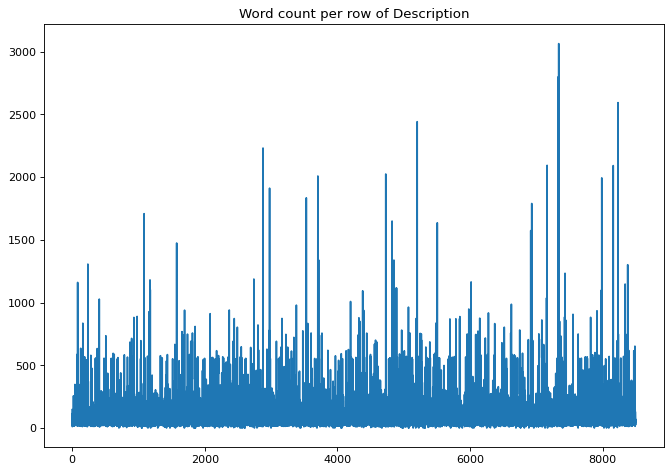

Review length: 
Mean 110.61 words (172.504112)


In [142]:
from matplotlib import pyplot
import numpy
from matplotlib.pyplot import figure

figure(figsize=(10, 7), dpi=80)
# Summarize review length
result = [len(x) for x in dfEngTrans.EngDescription]
# plot review length
pyplot.plot(result)
pyplot.title('Word count per row of Description')
pyplot.show()
print("Review length: ")
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))

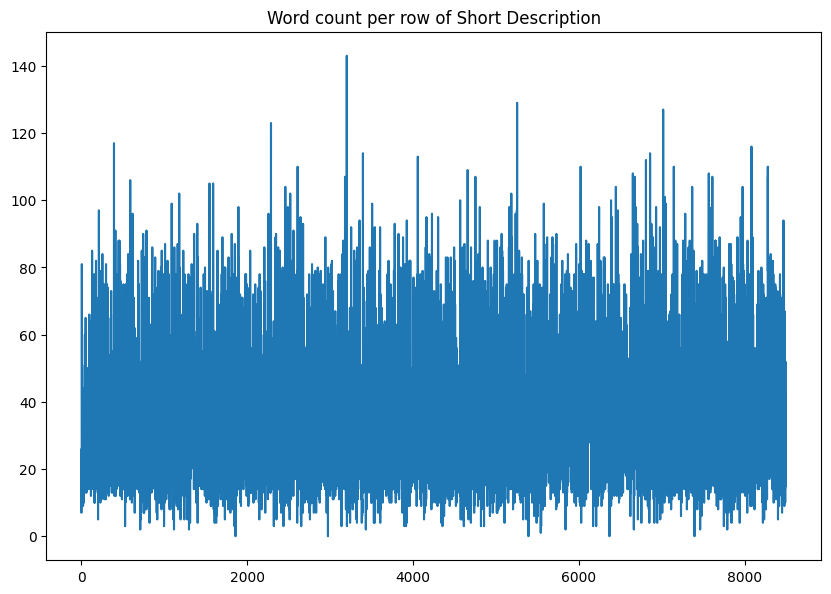

Review length: 
Mean 34.48 words (19.228043)


In [149]:
figure(figsize=(10, 7), dpi=100)

# Summarize review length
result = [len(x) for x in dfEngTrans.EngShtDescription]
# plot review length
pyplot.plot(result)
pyplot.title('Word count per row of Short Description')
pyplot.show()
print("Review length: ")
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))

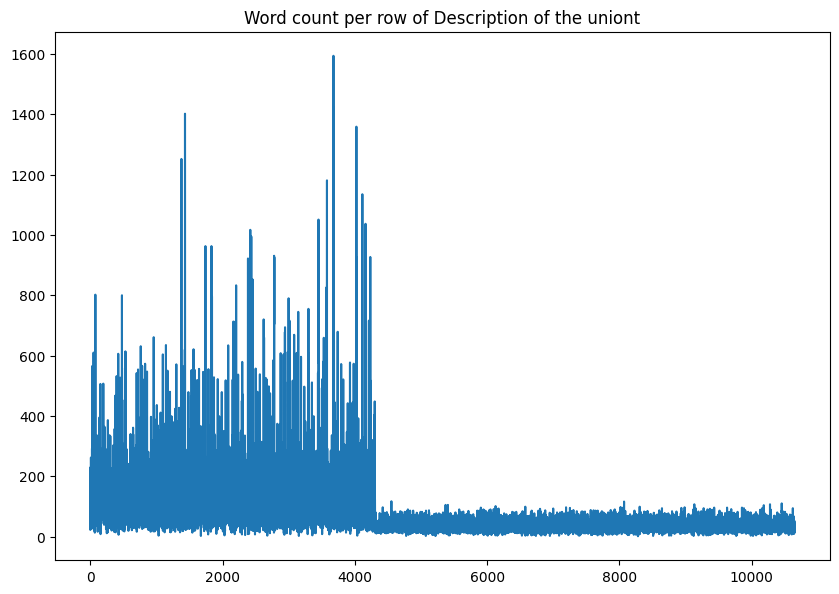

Review length: 
Mean 76.63 words (97.048264)


In [150]:
figure(figsize=(10, 7), dpi=100)

# Summarize review length
result = [len(x) for x in union.EngDescription]
# plot review length
pyplot.plot(result)
pyplot.title('Word count per row of Description of the uniont')
pyplot.show()
print("Review length: ")
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))

From the above it is clear that the 1st 8500 records are of Description and followed by Description.

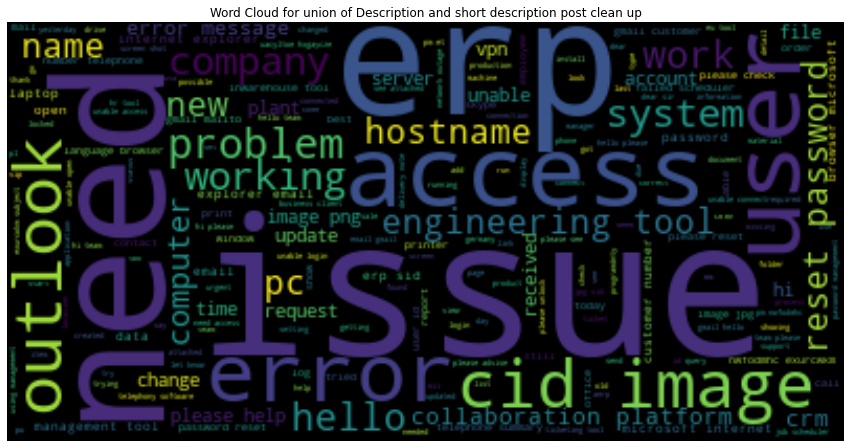

In [136]:
WordClouddf(union['EngDescription'],'Word Cloud for union of Description and short description post clean up')

#ML

### Preprocessing before feeding all the parameters into the model

In [320]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(union['EngDescription'], union['Assignment group'], test_size=0.2, random_state=42)

In [321]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

In [322]:
tfidf_vect = TfidfVectorizer(min_df=5 ,use_idf=True,analyzer='word', token_pattern=r'\w{1,}')
tfidf_vect.fit(union['EngDescription'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(test_x)

### **Training and Testing on Diffrent models**


1. Kfold with diffrent ML algorithms and SKlearn's MLP

In [323]:
#-----------------------------------
# TRAINING OUR MODEL
# K-FOLD
#-----------------------------------
import h5py
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.externals import joblib

warnings.filterwarnings('ignore')

In [324]:
# create all the machine learning models
seed      = 43
num_trees = 100
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', MultinomialNB()))
models.append(('SVM', SVC(random_state=seed)))
models.append(('XGBOOST', XGBClassifier()))
models.append(('MLP Classifier', MLPClassifier(solver='lbfgs', alpha=1e-5,
                                               hidden_layer_sizes=(100, 2), random_state=1)))

# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(xtrain_tfidf.shape))
print("[STATUS] labels shape: {}".format(train_y.shape))

print("[STATUS] training started...")

[STATUS] features shape: (8520, 2486)
[STATUS] labels shape: (8520,)
[STATUS] training started...


LR: 0.563263 (0.006412)
KNN: 0.511620 (0.007172)
CART: 0.512676 (0.005624)
RF: 0.593897 (0.010706)
NB: 0.506455 (0.003980)
SVM: 0.566549 (0.008288)
XGBOOST: 0.558216 (0.004971)
MLP Classifier: 0.435915 (0.016917)


<Figure size 1600x1000 with 0 Axes>

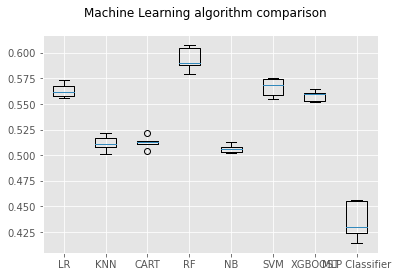

In [325]:
from matplotlib.pyplot import figure

figure(figsize=(16, 10), dpi=100)
scoring    = "accuracy"
results=[]
names=[]
# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, xtrain_tfidf, train_y, cv=5, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## 2. Traninig with ANN

In [326]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np 
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.display import display, HTML

In [327]:
num_class = len(np.unique(union['Assignment group'].values))
y = union['Assignment group Number'].values

In [328]:
from nltk.tokenize import RegexpTokenizer
import re

In [329]:
all_words = list()
for comp in union['EngDescription']:
    for w in complaint_to_words(comp):
        all_words.append(w)

In [330]:
all_words_set = set(all_words)
unique_all_words = (list(all_words_set))

In [331]:
index_dict = dict()
count = 1
for word in set(unique_all_words):
    index_dict[word] = count
    count += 1

In [332]:
numWords=len(index_dict)

In [333]:
maxlen = 300

In [334]:
# EMBEDDING_FILE = './glove.6B.200d.txt'
EMBEDDING_FILE = '/content/drive/MyDrive/Capstone/glove.6B.300d.txt'
embeddings_glove = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings_glove[word] = embd

In [335]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report


tfidf = TfidfVectorizer(max_features=5000)
x_tfidf = tfidf.fit_transform(union['EngDescription']).toarray()

In [336]:
tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(union['EngDescription'])
X = tokenizer.texts_to_sequences(union['EngDescription'])
X = pad_sequences(X, maxlen = maxlen)

grpCnt = len(union['Assignment group'].unique())

y = np.asarray(union['Assignment group Number'])

X = np.asarray(X)

embedding_matrix = np.zeros((numWords+1, 300))
for i,word in tokenizer.index_word.items():
  if i<numWords+1:
    embedding_vector = embeddings_glove.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [337]:
X.shape

(10651, 300)

In [338]:
MAX_LENGTH =300

In [339]:
num_class = len(np.unique(union['Assignment group'].values))
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model_history = model.fit([X_train], batch_size=100, y=to_categorical(y_train), verbose=1, validation_split=0.2, 
          shuffle=True, epochs=10, callbacks=[checkpointer])

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 300)]             0         
_________________________________________________________________
embedding_13 (Embedding)     (None, 300, 128)          1552000   
_________________________________________________________________
flatten_10 (Flatten)         (None, 38400)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                1228832   
_________________________________________________________________
dense_27 (Dense)             (None, 74)                2442      
Total params: 2,783,274
Trainable params: 2,783,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
69/69 [==============================] - 5s 60ms/step - loss: 3.2010 - acc: 0.4111 - val_loss: 2.7494 -

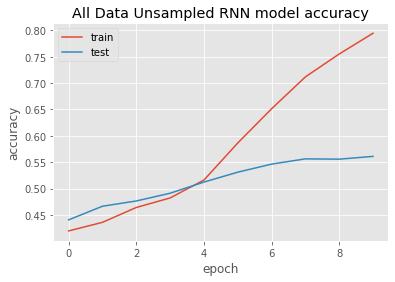

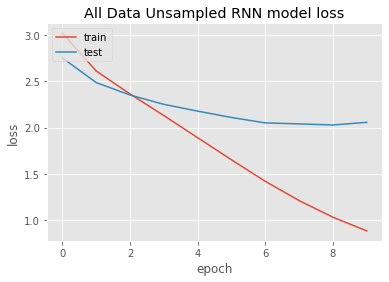

In [340]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])

plt.title('All Data Unsampled RNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('All Data Unsampled RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# RNN

In [341]:
X_test=[]
y_test=[]
embedding_matrix=[]

In [342]:
def complaint_to_words(comp):
    
    words = RegexpTokenizer('\w+').tokenize(comp)
    words = [re.sub(r'([xx]+)|([XX]+)|(\d+)', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    
    return words

In [343]:
all_words = list()
for comp in union['EngDescription']:
    for w in complaint_to_words(comp):
        all_words.append(w)

In [344]:
all_words_set = set(all_words)
unique_all_words = (list(all_words_set))

In [345]:
index_dict = dict()
count = 1
for word in set(unique_all_words):
    index_dict[word] = count
    count += 1

In [346]:
numWords=len(index_dict)

In [347]:
maxlen = 300

In [348]:
# EMBEDDING_FILE = './glove.6B.200d.txt'
EMBEDDING_FILE = '/content/drive/MyDrive/Capstone/glove.6B.300d.txt'
embeddings_glove = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings_glove[word] = embd

In [349]:
tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(union['EngDescription'])
X = tokenizer.texts_to_sequences(union['EngDescription'])
X = pad_sequences(X, maxlen = maxlen)

grpCnt = len(union['Assignment group'].unique())

y = np.asarray(union['Assignment group Number'])

X = np.asarray(X)

embedding_matrix = np.zeros((numWords+1, 300))
for i,word in tokenizer.index_word.items():
  if i<numWords+1:
    embedding_vector = embeddings_glove.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [350]:
embed = Embedding(numWords+1,output_dim=50,input_length=maxlen,trainable=True)
model = Sequential()
model.add(Input(shape=(maxlen,),dtype=tf.int64))
model.add(embed)
model.add(Conv1D(100,10,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(100,10,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(128))) ## drop it later maybe for testing ..
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dense(grpCnt,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 300, 50)           599000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 291, 100)          50100     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 145, 100)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 145, 100)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 136, 100)          100100    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 68, 100)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)              

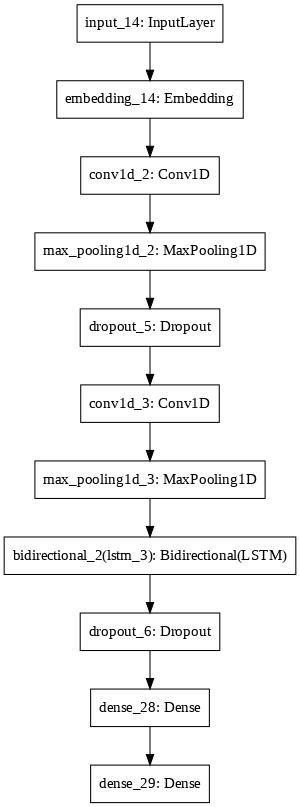

In [351]:
plot_model(model,to_file="RNN.jpg", dpi=75)

In [352]:
batch_size=100
epochs = 10

In [353]:
checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
model_history=model.fit(X_train,y_train,batch_size=100, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_test, y_test))

Epoch 1/10
86/86 [==============================] - 86s 937ms/step - loss: 3.2535 - accuracy: 0.4064 - val_loss: 2.8184 - val_accuracy: 0.4148

Epoch 00001: val_accuracy improved from -inf to 0.41483, saving model to model-001-0.414829.h5
Epoch 2/10
86/86 [==============================] - 88s 1s/step - loss: 2.7246 - accuracy: 0.4301 - val_loss: 2.5657 - val_accuracy: 0.4378

Epoch 00002: val_accuracy improved from 0.41483 to 0.43782, saving model to model-002-0.437823.h5
Epoch 3/10
86/86 [==============================] - 79s 919ms/step - loss: 2.4205 - accuracy: 0.4599 - val_loss: 2.4560 - val_accuracy: 0.4519

Epoch 00003: val_accuracy improved from 0.43782 to 0.45190, saving model to model-003-0.451901.h5
Epoch 4/10
86/86 [==============================] - 79s 920ms/step - loss: 2.2419 - accuracy: 0.4790 - val_loss: 2.4493 - val_accuracy: 0.4514

Epoch 00004: val_accuracy did not improve from 0.45190
Epoch 5/10
86/86 [==============================] - 79s 921ms/step - loss: 2.1035

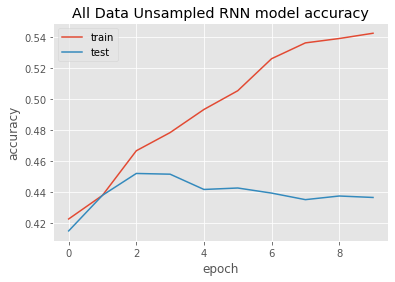

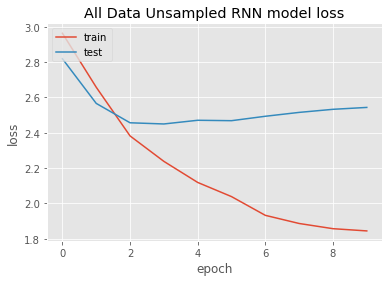

In [354]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('All Data Unsampled RNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('All Data Unsampled RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#LSTM

In [355]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 


import tensorflow.keras.layers as L 
from tensorflow.keras.losses import SparseCategoricalCrossentropy 
from tensorflow.keras.optimizers import Adam 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics  import classification_report 

import nltk 
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import TweetTokenizer, word_tokenize 
from nltk.corpus import stopwords 

import re
from sklearn.preprocessing import LabelEncoder

import keras

from keras import layers
# For Embedding Layer
from keras.layers.embeddings import Embedding

# For RNN Layer
from keras.models import Sequential
from keras.layers import Embedding, GRU, LSTM, Bidirectional
from keras.layers import Dense, Dropout, Activation, Input,  Flatten

# import numpy as np
# from tensorflow import keras
# from tensorflow.keras import layers

# For CNN Layer
from keras.layers import Conv1D, MaxPooling1D

# For Text Summarization
from gensim.summarization import summarize

In [356]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
union['Assignment_group_encoded'] = label_encoder.fit_transform(union['Assignment group']) 
  
union['Assignment_group_encoded'].unique()

array([ 0,  1, 34, 45, 67, 56, 72,  3,  6,  7,  8,  9, 10, 12, 11, 15, 16,
       17, 23,  5, 20, 73, 25, 14, 21,  4, 22, 27, 18,  2, 29, 31, 32, 35,
       36, 28, 37, 30, 38, 19, 40, 41, 39, 42, 43, 44, 46, 13, 47, 48, 49,
       50, 51, 52, 24, 54, 55, 33, 57, 26, 59, 60, 61, 62, 63, 64, 65, 66,
       68, 69, 71, 53, 58, 70])

In [357]:
union['EngDescription'][2]

'hi cannot log vpn best'

In [358]:
MAX_LENGTH = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(union.EngDescription.values)
post_seq = tokenizer.texts_to_sequences(union.EngDescription.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [359]:
y = union['Assignment_group_encoded']
y.shape

(10651,)

In [360]:
post_seq_padded.shape

(10651, 500)

In [361]:
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.3, random_state=1)

X_train.shape,X_test.shape

((7455, 500), (3196, 500))

In [362]:
vocab_size = len(tokenizer.word_index) + 1
max_features = vocab_size 
vocab_size

12125

In [363]:
import numpy as np
num_class = len(np.unique(union['Assignment_group_encoded'].values))
num_class

74

## Creating sequential Model with LSTM

In [364]:
inputs = keras.Input(shape=(MAX_LENGTH, ), dtype="int32")

# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
x = layers.Dropout(0.2)(x)

# Add 2 LSTM layers
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64, return_sequences=False)(x)

x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(num_class, activation='softmax')(x)

In [365]:
# Add a classifier
lstm_model = keras.Model(inputs, outputs)
lstm_model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 500)]             0         
_________________________________________________________________
embedding_15 (Embedding)     (None, 500, 128)          1552000   
_________________________________________________________________
dropout_7 (Dropout)          (None, 500, 128)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 500, 64)           49408     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                208

In [366]:
lstm_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [367]:
training_history = lstm_model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
75/75 [==============================] - 119s 2s/step - loss: 3.5784 - accuracy: 0.3987 - val_loss: 2.7685 - val_accuracy: 0.4309
Epoch 2/10
75/75 [==============================] - 115s 2s/step - loss: 2.8346 - accuracy: 0.4110 - val_loss: 2.5621 - val_accuracy: 0.4309
Epoch 3/10
75/75 [==============================] - 114s 2s/step - loss: 2.5675 - accuracy: 0.4280 - val_loss: 2.4678 - val_accuracy: 0.4571
Epoch 4/10
75/75 [==============================] - 114s 2s/step - loss: 2.3490 - accuracy: 0.4627 - val_loss: 2.4004 - val_accuracy: 0.4612
Epoch 5/10
75/75 [==============================] - 114s 2s/step - loss: 2.2666 - accuracy: 0.4586 - val_loss: 2.3928 - val_accuracy: 0.4656
Epoch 6/10
75/75 [==============================] - 114s 2s/step - loss: 2.1274 - accuracy: 0.4855 - val_loss: 2.3940 - val_accuracy: 0.4737
Epoch 7/10
75/75 [==============================] - 114s 2s/step - loss: 2.0585 - accuracy: 0.4943 - val_loss: 2.4127 - val_accuracy: 0.4828
Epoch 8/10
75

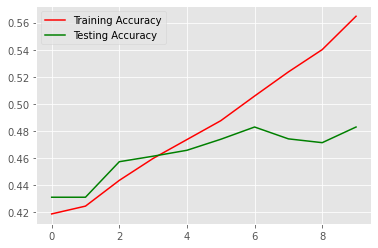

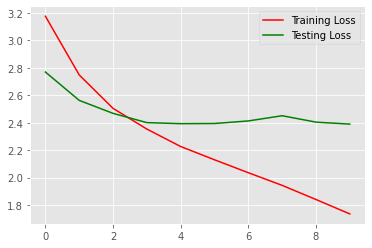

In [368]:
%matplotlib inline
acc=training_history.history['accuracy']
val_acc=training_history.history['val_accuracy']
loss=training_history.history['loss']
val_loss=training_history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

# Bidirectional GATED RECURRENT UNIT (GRU)

In [369]:
#Building the GRU Model
embedding_dim = 128
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=MAX_LENGTH),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 500, 128)          1552000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                14016     
_________________________________________________________________
dense_32 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_33 (Dense)             (None, 74)                518       
Total params: 1,566,732
Trainable params: 1,566,732
Non-trainable params: 0
_________________________________________________________________


In [370]:
#model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
num_epochs = 10
batch_size=100

In [371]:
gru_training_history = model_gru.fit(X_train, y_train, batch_size=100, epochs=2, validation_data=(X_test, y_test))


Epoch 1/2
75/75 [==============================] - 52s 646ms/step - loss: 4.2028 - accuracy: 0.0220 - val_loss: 3.3125 - val_accuracy: 0.4309
Epoch 2/2
75/75 [==============================] - 48s 637ms/step - loss: 2.9673 - accuracy: 0.4249 - val_loss: 2.5711 - val_accuracy: 0.4406


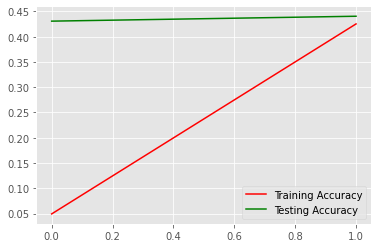

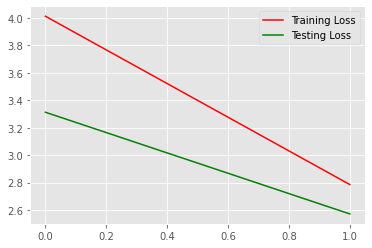

In [372]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=gru_training_history.history['accuracy']
val_acc=gru_training_history.history['val_accuracy']
loss=gru_training_history.history['loss']
val_loss=gru_training_history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show() 